## Edge detection and Segmentation

# Assignment 5

Deeksha M S - 171EC113
Niranjan - 171EC130
Varun Kumar - 171EC251

## Q1. Sobel and Laplacian Edge Detectors

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import cv2
import random
import time
from PIL import Image, ImageFilter
import scipy.misc
from numpy.lib.stride_tricks import as_strided

image Shape (512, 512)


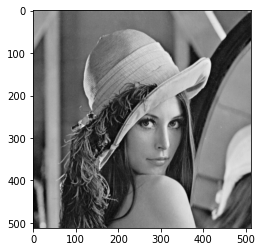

In [2]:
image = cv2.imread('lenna.tif',0) # Only for grayscale image
plt.imshow(image,cmap='gray')
print("image Shape",image.shape)


### Function Definitions

In [3]:
# Convolution Fucntion
def convolution(image, kernel, average=False):

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    return output

# Sobel Edge Detector 
def sobel_edge_detection(image, filter):
    new_image_x = convolution(image, filter)
    new_image_y = convolution(image, np.flip(filter.T, axis=0))
    
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    return new_image_x, new_image_y, gradient_magnitude

# Laplacian Edge Detector 
def laplacian(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
    new_image_x *= 255.0 / new_image_x.max()
    
    grad_x = cv2.convertScaleAbs(new_image_x)

    return grad_x


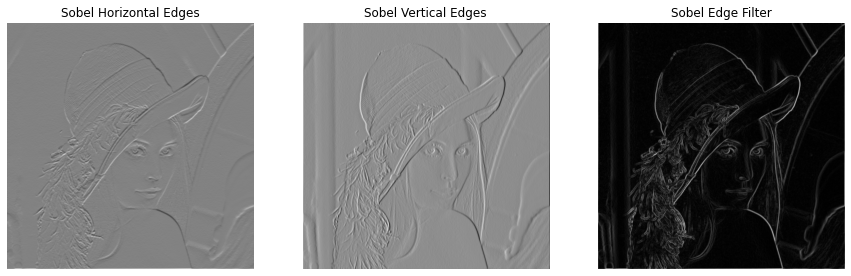

In [4]:
t0 = time.time()
filter1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
filter2 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

vert_edge, hori_edge, sobel_edge = sobel_edge_detection(image, filter2)
laplacian_edge = laplacian(image, filter1, verbose=True)

t1 = time.time()
scratch_time = t1-t0

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(hori_edge,cmap='gray')
ax1.set_title('Sobel Horizontal Edges')
ax2.imshow(vert_edge, cmap='gray')
ax2.set_title('Sobel Vertical Edges')

ax3.imshow(sobel_edge, cmap='gray')
ax3.set_title('Sobel Edge Filter')


f.set_figheight(8)
f.set_figwidth(15)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

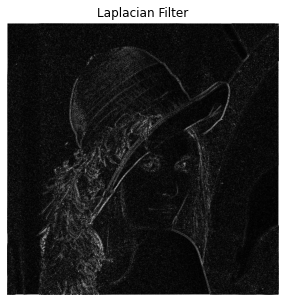

In [5]:
f, ax = plt.subplots(figsize=(5, 5))
ax.imshow(laplacian_edge, cmap='gray')
ax.set_title('Laplacian Filter')
ax.axis('off')
plt.show()


### Sobel and Laplacian Edge filters using CV2

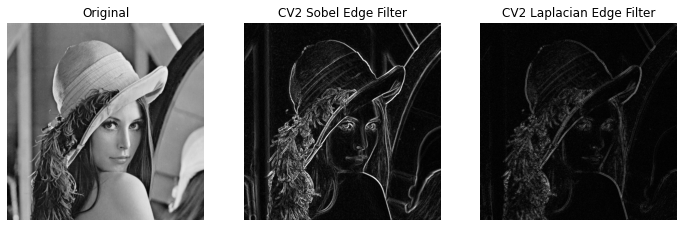

In [6]:
t0 = time.time()
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
sobel_cv2 = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

img = cv2.GaussianBlur(image, (3, 3), 0)
img = cv2.Laplacian(img, cv2.CV_64F)
laplacian_cv2 = cv2.convertScaleAbs(img)

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(image,cmap='gray')
ax1.set_title('Original')
ax2.imshow(sobel_cv2, cmap='gray')
ax2.set_title('CV2 Sobel Edge Filter')
ax3.imshow(laplacian_cv2, cmap='gray')
ax3.set_title('CV2 Laplacian Edge Filter')

f.set_figheight(8)
f.set_figwidth(12)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()
t1 = time.time()
cv2_time = t1-t0


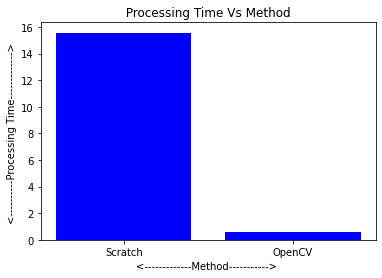

Time for Scratch Implementation: 15.566928148269653 
Time for opencv function: 0.5644409656524658


In [7]:
x = ['Scratch', 'OpenCV']
times = [scratch_time, cv2_time]
x_pos = [i for i in range(len(x))]
plt.bar(x_pos, times, color='blue')
plt.xlabel("<-------------Method-----------> ")
plt.ylabel("<----------Processing Time-------------> ")
plt.title(" Processing Time Vs Method ")
plt.xticks(x_pos, x)
plt.show()


print('Time for Scratch Implementation:', scratch_time, 
      '\nTime for opencv function:', cv2_time)

## Question 2: Canny Detection Algorithm

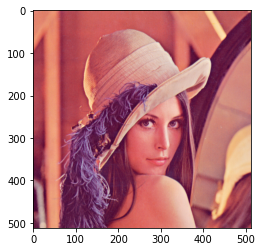

In [8]:
img = cv2.imread('lenna.tif')

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

### Step 1: Noise Reduction

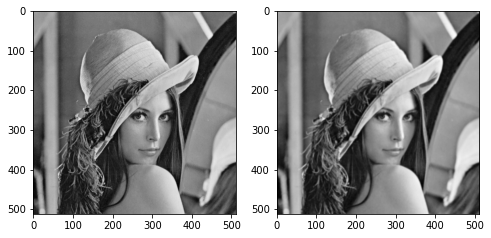

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)

f, ax = plt.subplots(1,2,figsize = (8,7))
ax[0].imshow(gray,cmap = 'gray')
ax[1].imshow(blur,cmap = 'gray')
plt.show()

### Step 2: Finding intensity gradient of the image

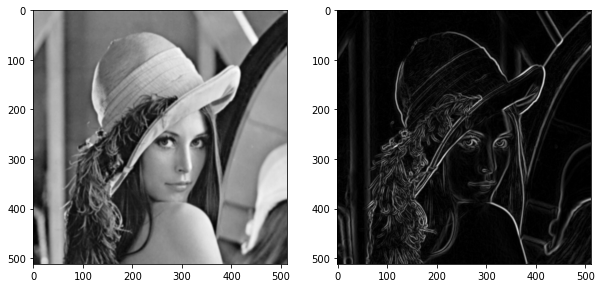

In [10]:
# Apply Sobelx in high output datatype 'float16' as in opencv canny
# and then converting back to 8-bit to prevent overflow
dtype = cv2.CV_16SC1

sobelx_16 = cv2.Sobel(blur,dtype,1,0,ksize=3)
absx_16 = np.absolute(sobelx_16)
sobelx_8u1 = absx_16/absx_16.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

sobely_64 = cv2.Sobel(blur,dtype,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max() * 255
mag = np.uint8(mag)

theta = np.arctan2(sobely_8u, sobelx_8u)
angle = np.rad2deg(theta)

f, ax = plt.subplots(1,2,figsize = (10,7))
ax[0].imshow(blur,cmap = 'gray')
ax[1].imshow(mag,cmap = 'gray')
plt.show()

### Step 3: Non-max Suppression

(512, 512)


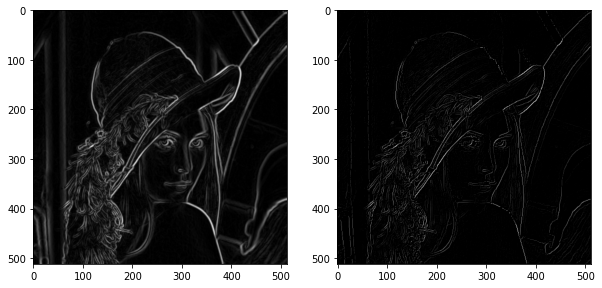

In [11]:
M, N = mag.shape
Non_max_img = np.zeros((M,N),dtype = np.uint8)

for i in range(1, M-1):
    for j in range(1,N-1):
        if(0 <= abs(angle[i,j]) < 22.5) or (157.25 <= abs(angle[i,j]) < 180):
            b = mag[i,j-1]
            c = mag[i,j+1]
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):   
            b = mag[i-1,j-1]
            c = mag[i+1,j+1]
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5): ## Vertical 90
            b = mag[i-1,j]
            c = mag[i+1,j]
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1,j-1]
            c = mag[i-1,j+1]  
        
        if (mag[i,j] > b) and (mag[i,j] > c):
                Non_max_img[i,j] = mag[i,j]
        else:
            Non_max_img[i,j] = 0
print(Non_max_img.shape)
f, plots = plt.subplots(1, 2, figsize = (10,7))  
plots[0].imshow(mag, cmap = 'gray') 
plots[1].imshow(Non_max_img, cmap = 'gray') 
plt.show()

### Step 4: Double thresholding

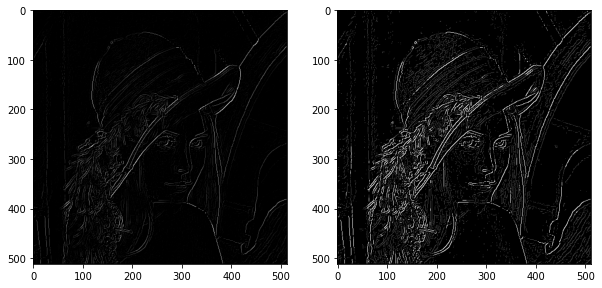

In [12]:
high_thresh = 50 
low_thresh = 8
double_thresh = np.zeros((M,N), dtype = np.uint8)

strong_i, strong_j = np.where(Non_max_img >= high_thresh)
zero_i, zero_j = np.where(Non_max_img < low_thresh)
weak_i, weak_j = np.where( (low_thresh <= Non_max_img) & (Non_max_img < high_thresh))

double_thresh[strong_i, strong_j] = 255
double_thresh[weak_i, weak_j] = 75
double_thresh[zero_i, zero_j] = 0

f, plots = plt.subplots(1, 2, figsize = (10,7))  
plots[0].imshow(Non_max_img, cmap = 'gray') 
plots[1].imshow(double_thresh, cmap = 'gray') 
plt.show()

### Step 5: Edge tracking by hysterisis

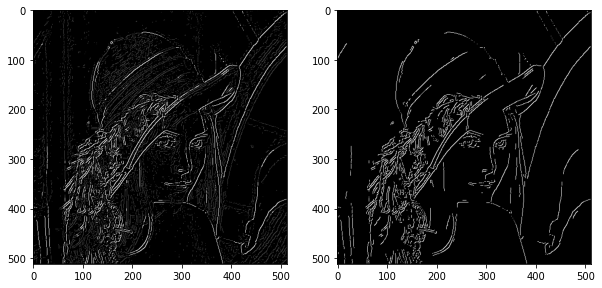

In [13]:
out = np.copy(double_thresh)

for i in range(1, M-1):
    for j in range(1,N-1):
        if(out[i,j] == 75):
            if (255 in [out[i-1,j-1],out[i,j],out[i+1, j-1],out[i-1,j],out[i+1, j],out[i-1,j+1],out[i,j+1], out[i+1,j+1]]):
                out[i,j] = 255
            else:
                out[i,j] = 0
                
f, plots = plt.subplots(1, 2, figsize = (10,7))  
plots[0].imshow(double_thresh, cmap = 'gray') 
plots[1].imshow(out, cmap = 'gray') 
plt.show()

### Comparison with OpenCV

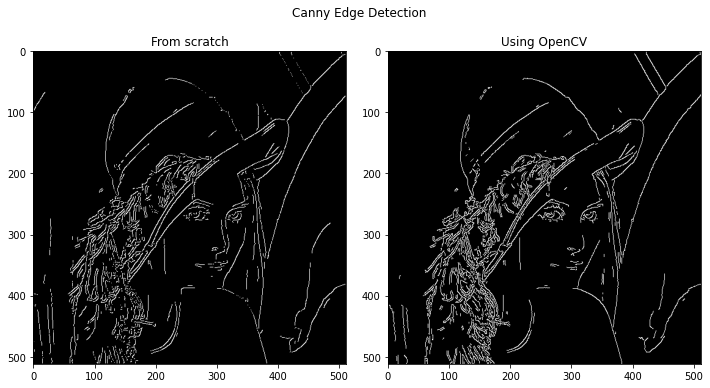

In [14]:
edges = cv2.Canny(gray,150,200,apertureSize =  3,L2gradient = False)

f, ax = plt.subplots(1, 2, figsize = (10,6))
f.tight_layout()
ax[0].imshow(out, cmap = 'gray') 
ax[0].set_title('From scratch')
ax[1].imshow(edges, cmap = 'gray') 
ax[1].set_title('Using OpenCV')
plt.suptitle('Canny Edge Detection')
plt.show()

## Q3. Edge Detection : A Statistical Approach

In [15]:
# Function for Padding Image
def padding(img,pad):

    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad))
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img

# Step 1 - Edge Detection
def edge(image, z):
    H,W = image.shape
    a = z//2
    count=0
    sum =0 
    padded_img = padding(image,a)
    filtered_img = padded_img
    for i in range(a,H+a+1):
        for j in range(a,W+a+1):
            window = (padded_img[i-a:i+z-a,j-a:j+z-a])
            p_ = 0
            for p in range(window.shape[0]):
                for q in range(window.shape[1]):
                    if(abs(window[p][q] - padded_img[i][j])<=15):
                        p_ = p_+1

            window_sum = np.sum(window) - padded_img[i,j]
            avg = window_sum/24
            if(abs(padded_img[i][j] - avg <= 120 and p_>=9)):
                filtered_img[i][j] = 0
            else:
                filtered_img[i][j] = 255     
    return filtered_img.astype(int)

#Step 2 - Denoise Image
def denoise(image):
    clean_img = image
    for i in range(2,515):
        for j in range(2,515):
            if(image[i][j] != 0):
                if(image[i][j-1] + image[i][j+1] +image[i-1][j] +image[i+1][j] <= 255):
                    clean_img[i][j] = 0
            else:
                if(image[i][j-1] + image[i][j+1] +image[i-1][j] +image[i+1][j] >= 765):
                    clean_img[i][j] = 255
    return clean_img



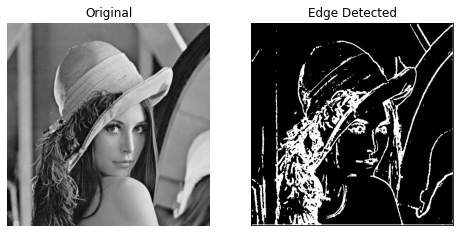

In [16]:
# Edge Detection
z = 5 # Filter Size
edge_detect = edge(image,z)
# Denoise
edge_detect = denoise(edge_detect)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image,cmap='gray')
ax1.set_title('Original')
ax2.imshow(edge_detect, cmap='gray')
ax2.set_title('Edge Detected')

f.set_figheight(8)
f.set_figwidth(8)
ax1.axis('off')
ax2.axis('off')

plt.show()

## Question 4: Improved Canny edge detection

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.signal as sig
import scipy.ndimage as ndimage

In [18]:
image = cv2.imread('lenna.tif', 0)
print('Image shape = ', image.shape)


Image shape =  (512, 512)


### Step 1: Adaptive filter

In [19]:
def improved_filter(img, n_iter=1):
    f = img
    nx, ny = img.shape
    h = 1.
    for i in range(n_iter):
        f_pad = np.pad(f, ((1,1),(1,1)), mode='constant', constant_values=0)
        Gx = np.array([ 0.5*(f_pad[i+1 , 1:-1] - f_pad[i-1 , 1:-1]) for i in range(1, nx+1, 1)])
        Gy = np.array([ 0.5*(f_pad[1:-1 , i+1] - f_pad[1:-1 , i-1]) for i in range(1, ny+1, 1)]).T
        dxy = np.sqrt( Gx**2 + Gy**2)
        w = np.exp(-dxy**0.5/(2*h**2))
        f = apply_filter(f, w)      
    return f
                         
def apply_filter(f, w):
    w_pad = np.pad(w, ((1,1), (1,1)), mode='constant', constant_values=0 )
    f_pad = np.pad(f, ((1,1),(1,1)), mode='constant', constant_values=0)
    nx, ny = f.shape
    for x in range(1, nx+1, 1):
        for y in range(1, ny+1, 1):
         
            N = np.sum([[w_pad[x+i, y+j] for j in range(-1,2,1)] for i in range(-1,2,1)])
            f_pad[x,y] = 1./N * np.sum([[f_pad[x+i,y+j] * w_pad[x+i, y+j] for j in range(-1,2,1)] for i in range(-1,2,1)])
     
    return f_pad[1:-1, 1:-1]
                   
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

PSNR noisy =  20.243130882303007 PSNR filtered =  28.037904664292657


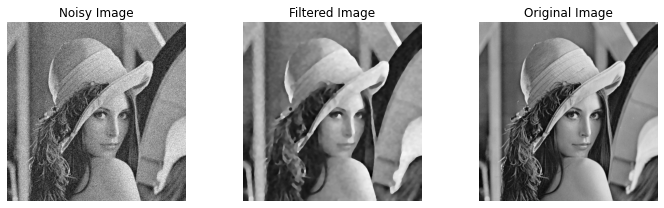

In [20]:
noisy_img =  image + 5*np.random.normal(0, 5, size=image.shape)
noisy_img = np.clip(noisy_img, 0, 255)
img_smooth = improved_filter(noisy_img, 10)
print('PSNR noisy = ', psnr(image, noisy_img), 'PSNR filtered = ', psnr(image, img_smooth))

f, ax = plt.subplots(1, 3, figsize= (10, 3), tight_layout = True)
ax[0].imshow(noisy_img, cmap='gray')
ax[0].set_title("Noisy Image")
ax[0].axis('off')

ax[1].imshow(img_smooth, cmap='gray')
ax[1].set_title("Filtered Image")
ax[1].axis('off')

ax[2].imshow(image, cmap='gray')
ax[2].set_title("Original Image")
ax[2].axis('off')
plt.show()

### Step 2: Algorithm for edge detection

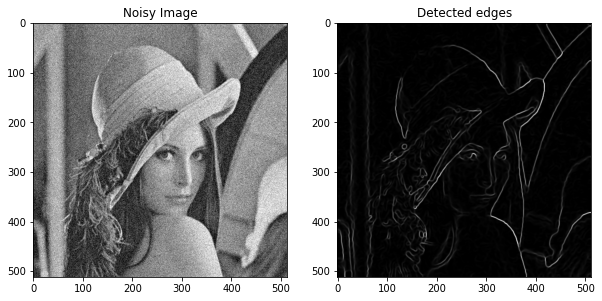

In [21]:
dtype = cv2.CV_16SC1

edge_1 = cv2.Sobel(img_smooth,dtype,1,0,ksize=3)
absx_16 = np.absolute(edge_1)
sobelx_8u1 = absx_16/absx_16.max()*255
edge_x = np.uint8(sobelx_8u1)

edge_2 = cv2.Sobel(img_smooth,dtype,0,1,ksize=3)
absy_64 = np.absolute(edge_2)
edge_2 = absy_64/absy_64.max()*255
edge_y = np.uint8(edge_2)

mag = np.hypot(edge_x, edge_y)
mag = mag/mag.max() * 255
mag = np.uint8(mag)

theta = np.arctan2(edge_y, edge_x)
angle = np.rad2deg(theta)

f, ax = plt.subplots(1,2,figsize = (10,7))
ax[0].imshow(noisy_img,cmap = 'gray')
ax[0].set_title('Noisy Image')
ax[1].imshow(mag,cmap = 'gray')
ax[1].set_title('Detected edges')
plt.show()

### Step 3: Thinning of Edge

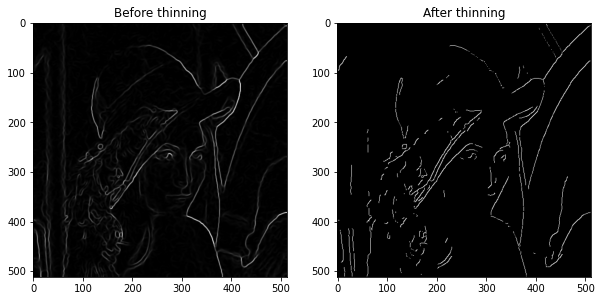

In [22]:
M, N = mag.shape
enhanced = np.zeros((M,N),dtype = np.uint8)

for i in range(1, M-1):
    for j in range(1,N-1):
        if(0 <= abs(angle[i,j]) < 22.5) or (157.25 <= abs(angle[i,j]) < 180):
            b = mag[i,j-1]
            c = mag[i,j+1]
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):   
            b = mag[i-1,j-1]
            c = mag[i+1,j+1]
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5): ## Vertical 90
            b = mag[i-1,j]
            c = mag[i+1,j]
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1,j-1]
            c = mag[i-1,j+1]  
        
        if (mag[i,j] > b) and (mag[i,j] > c):
            enhanced[i,j] = mag[i,j]
        else:
            enhanced[i,j] = 0

high_thresh = 50 
low_thresh = 8

thin_edge = np.zeros((M,N), dtype = np.uint8)

strong_i, strong_j = np.where(enhanced >= high_thresh)
zero_i, zero_j = np.where(enhanced < low_thresh)
weak_i, weak_j = np.where( (low_thresh <= enhanced) & (enhanced < high_thresh))

thin_edge[strong_i, strong_j] = 255
thin_edge[weak_i, weak_j] = 75
thin_edge[zero_i, zero_j] = 0

final_edge = thin_edge.copy() 
for i in range(1, M-1):
    for j in range(1,N-1):
        if(final_edge[i,j] == 75):
            if (255 in [final_edge[i-1,j-1],final_edge[i,j],final_edge[i+1, j-1],final_edge[i-1,j],final_edge[i+1, j],final_edge[i-1,j+1],final_edge[i,j+1], final_edge[i+1,j+1]]):
                final_edge[i,j] = 255
            else:
                final_edge[i,j] = 0
                
                
f, ax = plt.subplots(1, 2, figsize = (10,7))  
ax[0].imshow(mag, cmap = 'gray') 
ax[0].set_title('Before thinning')
ax[1].imshow(final_edge, cmap = 'gray') 
ax[1].set_title('After thinning')
plt.show()

### Comparison with Canny

We observe that canny algorithm fails in the presence of high noise content

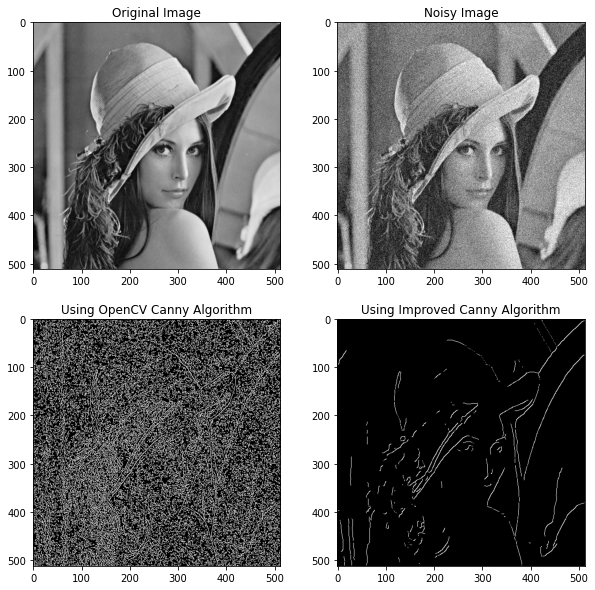

In [23]:
edges = cv2.Canny(np.uint8(noisy_img), 150, 200, apertureSize=3,L2gradient = False)
f, ax = plt.subplots(2, 2, figsize = (10,10)) 

ax[0,0].imshow(image, cmap = 'gray') 
ax[0,0].set_title('Original Image')
ax[0,1].imshow(noisy_img, cmap = 'gray') 
ax[0,1].set_title('Noisy Image')

ax[1,0].imshow(edges, cmap = 'gray') 
ax[1,0].set_title('Using OpenCV Canny Algorithm')
ax[1,1].imshow(final_edge, cmap = 'gray') 
ax[1,1].set_title('Using Improved Canny Algorithm')
plt.show()

## Question 5: Modified Otsu Thresholding

In [24]:
## Helper Functions

def otsu(img):
    ## Classical OTSU Thresholding
    hist = np.histogram(img.ravel(),bins = range(0,256))[0]
    L = 255
    p = hist/img.shape[0]/img.shape[1]
    otsu_thresh = 0
    var_max = 10
    for thresh in range(1,255):
        w_k = np.sum(p[0:thresh])
        if w_k == 0 or w_k == 1:
            continue
        mu_k = np.sum(p[0:thresh] * np.arange(0,thresh))
        mu_t = np.sum(p * np.arange(0,255))
        var_b = (mu_t * w_k - mu_k ) **2 / w_k / (1-w_k)
        
        if var_max < var_b:
            otsu_thresh = thresh
            var_max = var_b
    thresh_img = np.where(img<otsu_thresh, 0, 255)        
    return otsu_thresh, thresh_img


def modified_otsu(img):
    L = 256
    img =  img + 1
    hist = np.histogram(img.ravel(),bins = range(0,L+1))[0]
    
    p = hist/img.shape[0]/img.shape[1] + 1e-10
    
    w_k = np.cumsum(p)
    w_0 = w_k
    w_1 = 1 - w_k + 1e-7
    mu_k = np.cumsum( p * np.arange(1,L+1))
    mu_t = np.max(mu_k)
    mu_0 = mu_k / w_k
    mu_1 = (mu_t - mu_k) / (w_1)

    var_0_full = np.array([np.sum( (np.arange(1,k+2) - mu_0[k]) **2 * p[0:k+1] /w_0[k]) for k in range(0,L) ])
    var_1_full = np.array([np.sum( (np.arange(k+2,L+1) - mu_1[k]) **2 * p[k+1:] /w_1[k]) for k in range(0,L)  ])
    
    lambda_0 = np.sqrt((mu_0**2 + var_0_full)/2)
    lambda_1 = np.sqrt((mu_1**2 + var_1_full)/2)
    lambda_b = w_0 * w_1 * (lambda_1 - lambda_0) ** 2
    lambda_w = w_0 * lambda_0**2 + w_1 * lambda_1**2
    
    var_w = w_0 * var_0_full + w_1 * var_1_full
    var_b = w_0 * w_1 * (mu_1 - mu_0) **2
    var_t =  np.sum((np.arange(1,257) - mu_t )**2 * p)

    otsu_thresh = np.argmax(lambda_b)
    
    thresh_img = np.where(img < otsu_thresh, 0, 255)  
    
    subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
    print("\u03bb" + "0".translate(subscript) + ": " + str(lambda_0[otsu_thresh]))
    print("\u03bb" + "1".translate(subscript) + ": " + str(lambda_1[otsu_thresh]))
    print("\u03bb" + "B".translate(subscript) + ": " + str(lambda_b[otsu_thresh]))
    
    return otsu_thresh, thresh_img

λ₀: 38.72548061801421
λ₁: 107.85661429761737
λB: 1121.3980734542033
Modified Otsu Threshold: 90 
Normal Otsu Threshold: 104


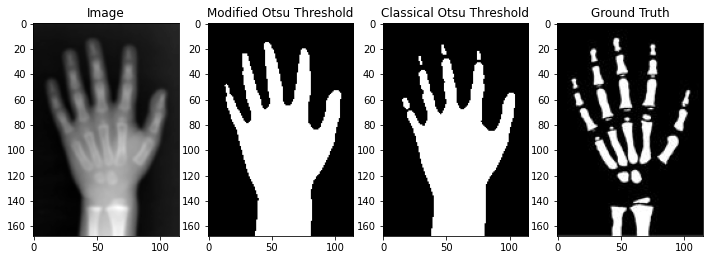

In [25]:
# img = cv2.imread('./standard_test_images/cameraman.tif',0)
img = cv2.imread('5329.jpg',0)

img = cv2.GaussianBlur(img,(5,5),0)

gt = cv2.imread('5329-GT.jpg',0)
gt = gt[3:,:-4]

modified_otsu_thresh, mo_thresh_img = modified_otsu(img)
otsu_thresh, otsu_thresh_img = otsu(img)


print(f"Modified Otsu Threshold: {modified_otsu_thresh} \nNormal Otsu Threshold: {otsu_thresh}")

f, ax = plt.subplots(1,4,figsize = (12,14))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Image')
ax[1].imshow(mo_thresh_img,cmap = 'gray')
ax[1].set_title('Modified Otsu Threshold')
ax[2].imshow(otsu_thresh_img,cmap = 'gray')
ax[2].set_title('Classical Otsu Threshold')
ax[3].imshow(gt,cmap = 'gray')
ax[3].set_title('Ground Truth')

plt.show()

### Comparison with OpenCV

In [26]:
img = cv2.imread('5329.jpg',0)
gt = cv2.imread('5329-GT.jpg',0)
gt = gt[3:,:-4]   # Since the shapes of GT and image don't match
print(f"Image Shape: {img.shape} \nGround truth shape: {gt.shape}")

Image Shape: (168, 115) 
Ground truth shape: (168, 115)


Obtained threshold using OpenCV (classical otsu):  104.0


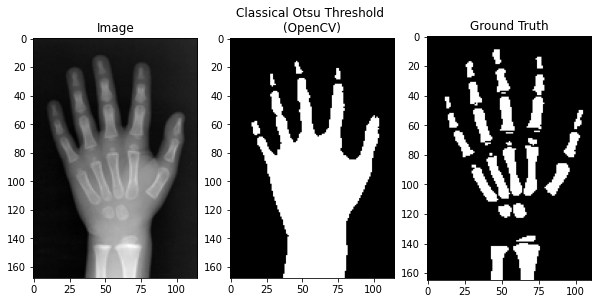

In [27]:
otsu_threshold, thresh_img = cv2.threshold(
    img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU,
)
print("Obtained threshold using OpenCV (classical otsu): ", otsu_threshold)

## Binarize GT so that metrics can be calculated
_, gt = cv2.threshold(
    gt, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU,
)

f, ax = plt.subplots(1,3,figsize = (10,14))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Image')
ax[1].imshow(thresh_img,cmap = 'gray')
ax[1].set_title('Classical Otsu Threshold \n(OpenCV)')
ax[2].imshow(gt[3:,:-4],cmap = 'gray')
ax[2].set_title('Ground Truth')
plt.show()

### Metrics

In [28]:
def get_precision(true,pred):
    TP = np.sum( (pred == 1) & (true == 1))
    FP = np.sum( (pred == 1) & (true == 0) )
    return TP / (TP + FP)

def get_recall_score(true, pred):
    TP = np.sum( (pred == 1) & (true == 1))
    FN = np.sum( (pred == 0) & (true == 1) )
    return TP/ (TP + FN)

def get_f1_score(true, pred):
    prec = get_precision(true, pred)
    recall = get_recall_score(true, pred)
    f1 = 2 * (prec * recall) / (prec + recall)
    return f1

def get_jaccard_score(true, pred):
    intersection = np.sum(true == pred)
    union = len(true) + len(pred) - intersection
    return intersection/union

### Modified Otsu Threshold

In [29]:
true = np.array(gt.ravel()/255,dtype = np.uint)
pred = np.array(mo_thresh_img.ravel()/255, dtype = np.uint)

#### Without sklearn

In [30]:
print("Precision score: ", get_precision(true,pred))
print("Recall score: ", get_recall_score(true,pred))
print("Jaccard score: ", get_jaccard_score(true, pred))
print("F1 score: ", get_f1_score(true, pred))

Precision score:  0.38118000546298825
Recall score:  0.9782684893094987
Jaccard score:  0.6158574833772426
F1 score:  0.5485995085995086


#### With sklearn

In [31]:
from sklearn.metrics import precision_score, recall_score, jaccard_score, f1_score

In [32]:
print("Precision score: ", precision_score(true, pred))
print("Recall score: ", recall_score(true,pred))
print("Jaccard score: ", jaccard_score(true, pred,average = "micro"))
print("F1 score: ", f1_score(true, pred))

Precision score:  0.38118000546298825
Recall score:  0.9782684893094987
Jaccard score:  0.6158574833772426
F1 score:  0.5485995085995086


### Classical Otsu Threshold

In [33]:
true = np.array(gt.ravel()/255,dtype = np.uint)
pred = np.array(otsu_thresh_img.ravel()/255, dtype = np.uint)

#### Without sklearn

In [34]:
print("Precision score: ", get_precision(true,pred))
print("Recall score: ", get_recall_score(true,pred))
print("Jaccard score: ", get_jaccard_score(true, pred))
print("F1 score: ", get_f1_score(true, pred))

Precision score:  0.40756756756756757
Recall score:  0.9249912372940764
Jaccard score:  0.6534017971758665
F1 score:  0.5658233276157805


#### With sklearn

In [35]:
print("Precision score: ", precision_score(true, pred))
print("Recall score: ", recall_score(true,pred))
print("Jaccard score: ", jaccard_score(true, pred,average = "micro"))
print("F1 score: ", f1_score(true, pred))

Precision score:  0.40756756756756757
Recall score:  0.9249912372940764
Jaccard score:  0.6534017971758665
F1 score:  0.5658233276157805


## Quesiton 6:
## Multi-level thresholding for image segmentation through a fast statistical recursive algorithm

In [36]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [37]:
image = cv2.imread('lenna.tif', 0)
print('Image shape = ', image.shape)
print(np.max(image), np.min(image))

Image shape =  (512, 512)
245 25


In [38]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [39]:
def MultiThreshold_Segmentation(image, n=2, k1 =1, k2=1):
    
    a = 0.0
    b = 255.0
    thresholds = []
    trial = image
    i = 0
    f, ax = plt.subplots(1, n//2, figsize= (3*n//2, 3), tight_layout = True)
    for i in range(0, n//2-1, 1):
        sort = np.sort(trial.reshape(-1))
        range_pixels = sort[sort>=a]
        range_pixels = range_pixels[range_pixels<=b]
        
        u = (np.mean(range_pixels))
        sigma = (np.std(range_pixels))
        T1 = int(u - k1*sigma)
        T2 = int(u + k2*sigma)
        
        
        #weights_lower
        lower = range_pixels[range_pixels<=T1] 
        
        mean_lower = round(np.average(lower)) if len(lower)>0 else 0
        thresholds.append([mean_lower, T1])
        #weights_upper
        upper = range_pixels[range_pixels>=T2] 
        mean_upper = round(np.average(upper)) if len(upper)>0 else 0
        thresholds.append([mean_upper, T2])
        
        segmented = np.zeros(trial.shape)
        segmented[trial<=T1] = mean_lower
        segmented[trial<a] = trial[trial<a]
        segmented[trial>T1] = trial[trial>T1]
        segmented[trial>=T2] = mean_upper
        segmented[trial>b] = trial[trial>b]
        ax[i].imshow(segmented, cmap='gray')
        ax[i].set_title('Level = '+ str(n)+ '  Step = '+ str( i+1))
    
        a = T1+1
        b = T2-1
        trial = segmented
        
    
    sort = np.sort(trial.reshape(-1))
    range_pixels = sort[sort>=a]
    range_pixels = range_pixels[range_pixels<=b]
    
    u = int(np.mean(range_pixels))
    T1 = int(u )
    T2 = int(u + 1)
    
    #weights_lower
    lower = range_pixels[range_pixels<=T1] 
    mean_lower = int(np.average(lower))
    thresholds.append([mean_lower, T1])
    #weights_upper
    upper = range_pixels[range_pixels>=T2] 
    mean_upper = int(np.average(upper))
    thresholds.append([mean_upper, T2])
  
    segmented = np.zeros(trial.shape)
    segmented[trial<=T1] = mean_lower
    segmented[trial<a] = trial[trial<a]
    segmented[trial>T1] = trial[trial>T1]
    segmented[trial>=T2] = mean_upper
    segmented[trial>b] = trial[trial>b]
    if n == 2: 
        plt.imshow(segmented, cmap='gray')
        plt.title('Level = 2  Step = 1')
        plt.show()
    else: 
        i = i+1
        ax[i].imshow(segmented, cmap='gray' )
        ax[i].set_title('Level = '+ str(n)+ '  Step = '+ str( i+1))
        plt.show()
    
    
    return segmented, thresholds

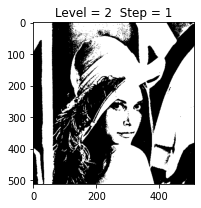

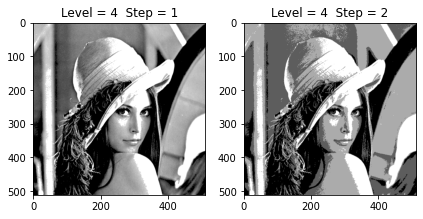

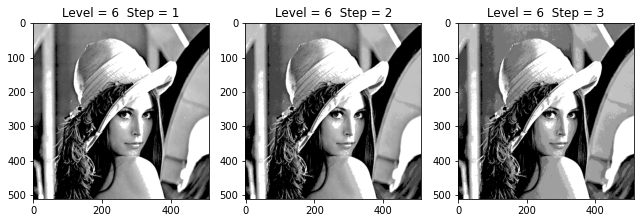

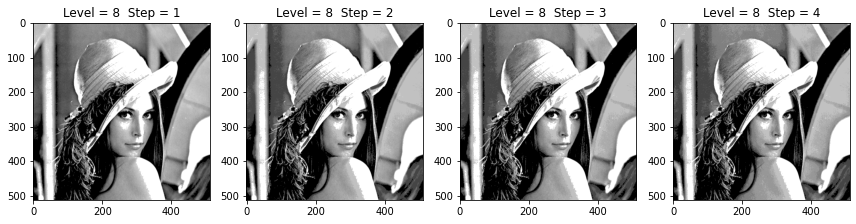

In [40]:
seg2, thres2 = MultiThreshold_Segmentation(image, 2)
seg4, thres4 = MultiThreshold_Segmentation(image, 4)
seg6, thres6 = MultiThreshold_Segmentation(image, 6)
seg8, thres8 = MultiThreshold_Segmentation(image, 8)

Threshold level = 2      PSNR = 19.66 dB     All thresholds = [ 81 161]
Threshold level = 4      PSNR = 25.95 dB     All thresholds = [ 54 105 148 194]
Threshold level = 6      PSNR = 28.54 dB     All thresholds = [ 54  92 118 141 160 194]
Threshold level = 8      PSNR = 29.29 dB     All thresholds = [ 54  92 110 124 137 148 160 194]


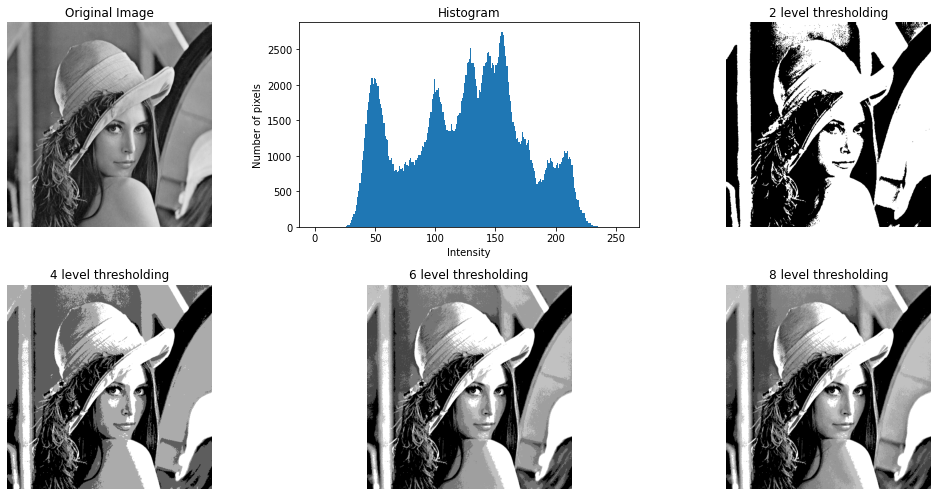

In [41]:
print('Threshold level =', 2 , 
          "     PSNR =", np.round(psnr(image, seg2), 2), 'dB',
    '    All thresholds =', np.sort(np.array(thres2)[:, 0]))
print('Threshold level =', 4 , 
          "     PSNR =", np.round(psnr(image, seg4), 2), 'dB',
    '    All thresholds =', np.sort(np.array(thres4)[:, 0]))
print('Threshold level =', 6 , 
          "     PSNR =", np.round(psnr(image, seg6), 2), 'dB',
    '    All thresholds =', np.sort(np.array(thres6)[:, 0]))
print('Threshold level =', 8 , 
          "     PSNR =", np.round(psnr(image, seg8), 2), 'dB',
    '    All thresholds =', np.sort(np.array(thres8)[:, 0]))

f, ax = plt.subplots(2, 3, figsize= (15,7), tight_layout = True)
ax[0,0].imshow(image, cmap='gray')
ax[0,0].set_title("Original Image")
ax[0,0].axis('off')

ax[0,1].hist(image.ravel(), 256 , [0,256])
ax[0,1].set_title('Histogram')
ax[0,1].set_xlabel('Intensity')
ax[0,1].set_ylabel('Number of pixels')

ax[0,2].imshow(seg2, cmap='gray')
ax[0,2].set_title("2 level thresholding")
ax[0,2].axis('off')

ax[1,0].imshow(seg4, cmap='gray')
ax[1,0].set_title("4 level thresholding")
ax[1,0].axis('off')

ax[1,1].imshow(seg6, cmap='gray')
ax[1,1].set_title("6 level thresholding")
ax[1,1].axis('off')

ax[1,2].imshow(seg8, cmap='gray')
ax[1,2].set_title("8 level thresholding")
ax[1,2].axis('off')
plt.show()